In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumGothicCoding')
mpl.rc('axes', unicode_minus=False)

data = np.loadtxt("C:/Users/tiger/Deeplearning/data-03-diabetes.csv", delimiter=",", dtype =np.float32)
x_data = data[:, 0:-1]
y_data = data[:, [-1]]

a = tf.Variable(tf.random.normal([8,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

def hypothesis(a,b):
    return tf.sigmoid(tf.matmul(x_data, a) + b)

def costfunc():
    return -tf.reduce_mean(y_data * tf.math.log(hypothesis(a,b)) + (1-y_data) * tf.math.log(1-hypothesis(a,b)))

def cost(a,b):
    return -tf.reduce_mean(y_data * tf.math.log(hypothesis(a,b)) + (1-y_data) * tf.math.log(1-hypothesis(a,b)))
                 
def graph():
    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx()
    ax0.set_title("학습 횟수에 따른 오차(cost)와 accuracy 변화")
    ax0.plot(cost_arr, 'r-', label="y0")
    ax0.set_ylabel("y0")
    ax0.grid(True)
    ax1.plot(accuracy_arr, 'b', label="y1")
    ax1.set_ylabel("y1")
    ax1.grid(False)
    ax0.set_xlabel("epochs")
    plt.show()

opt = tf.keras.optimizers.SGD(learning_rate = 0.1)                   
                   
epoch_arr = []
cost_arr = []
accuracy_arr = []

for step in range(10001):
    opt.minimize(costfunc, var_list=[a,b])
    predicted = tf.cast(hypothesis(a,b) > 0.5, dtype=tf.float64)
    epoch_arr.append(step)
    cost_arr.append(cost(a,b).numpy())
    accuracy = np.mean(y_data == predicted)
    accuracy_arr.append(accuracy)
    if step % 500 == 0:
        print("epochs=%d, cost= %.8f, w1= %.8f, w2= %.8f,... b = %.8f, accuracy= %.8f"%
              (step, cost(a,b), a.numpy()[0,0], a.numpy()[1,0], b.numpy()[0], accuracy))
    
graph()

print("=======================")
print("a =", a.numpy())
print("b =", b.numpy()[0])

predicted = tf.cast(hypothesis(a,b) > 0.5, dtype=tf.float64)
accuracy = np.mean(y_data == predicted)

print("Accuracy =", accuracy)

In [10]:
import tensorflow as tf
import numpy as np
from datetime import datetime

#실행할때마다 같은 결과를 출력하기 위한 seed 값 설정

seed = 0
tf.random.set_seed(seed)
np.random.seed(seed)

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y_data = np.array([[0],[1],[1],[0]], dtype=np.float32)

w1 = tf.Variable(tf.random.normal([2,5]), name='weight1')
b1 = tf.Variable(tf.random.normal([5]), name='bias1')
w2 = tf.Variable(tf.random.normal([5,1]), name='weight2')
b2 = tf.Variable(tf.random.normal([1]), name='bias2')

def hypothesis():
    layer1 = tf.sigmoid(tf.matmul(x_data, w1) + b1)
    cost = tf.sigmoid(tf.matmul(layer1, w2) + b2)
    return cost

##############################
#tenserboard로 추가
@tf.function
##############################

def costfunc():
    return -tf.reduce_mean(y_data * tf.math.log(hypothesis()) + (1-y_data) * tf.math.log(1-hypothesis()))

###################################
#tenserboard로 추가
stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = 'logs/mylogs/%s'%stamp
writer = tf.summary.create_file_writer(logdir)
tf.summary.trace_on(graph=True, profiler=True)
costfunc()
with writer.as_default() :
    tf.summary.trace_export(name='graph_t1', step=0, profiler_outdir=logdir)
###################################

train = tf.keras.optimizers.SGD(learning_rate = 0.1)                   


for step in range(10001):
    train.minimize(costfunc, var_list=[w1,b1,w2,b2])
    predicted = tf.cast(hypothesis() > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_data), dtype=tf.float32))
    if step % 1000 == 0:
        print(f'epochs={step}, cost={costfunc()}, accuracy={accuracy}')
        
print("\nHypotesis:", hypothesis().numpy(), "\nCorrect (Y):", predicted.numpy(), "\nAccuracy : ", accuracy.numpy()) 

epochs=0, cost=0.714250385761261, accuracy=0.5
epochs=1000, cost=0.6140005588531494, accuracy=0.75
epochs=2000, cost=0.2741397023200989, accuracy=1.0
epochs=3000, cost=0.10153737664222717, accuracy=1.0
epochs=4000, cost=0.05467737466096878, accuracy=1.0
epochs=5000, cost=0.03587387502193451, accuracy=1.0
epochs=6000, cost=0.026188112795352936, accuracy=1.0
epochs=7000, cost=0.020409200340509415, accuracy=1.0
epochs=8000, cost=0.01661650650203228, accuracy=1.0
epochs=9000, cost=0.013956611976027489, accuracy=1.0
epochs=10000, cost=0.011997770518064499, accuracy=1.0

Hypotesis: [[0.00582701]
 [0.98961055]
 [0.98444176]
 [0.01589498]] 
Correct (Y): [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy :  1.0


epochs=0, cost=5.526079177856445, accuracy=0.5
epochs=1000, cost=0.0009955876739695668, accuracy=1.0
epochs=2000, cost=0.0004306699556764215, accuracy=1.0
epochs=3000, cost=0.0002670946705620736, accuracy=1.0
epochs=4000, cost=0.00019107411208096892, accuracy=1.0
epochs=5000, cost=0.00014768631081096828, accuracy=1.0
epochs=6000, cost=0.00011974127846769989, accuracy=1.0
epochs=7000, cost=0.00010041140194516629, accuracy=1.0
epochs=8000, cost=8.622357563581318e-05, accuracy=1.0
epochs=9000, cost=7.544877007603645e-05, accuracy=1.0

Hypotesis: [[1.1315220e-04]
 [9.9997914e-01]
 [9.9997914e-01]
 [1.1315220e-04]] 
Correct (Y): [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy :  1.0


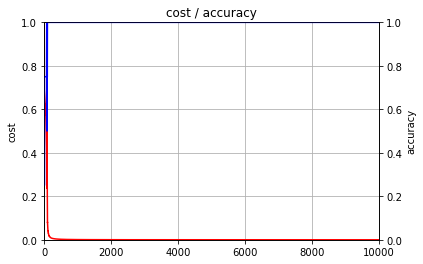

In [21]:
import tensorflow as tf
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
step_val = 10000
seed = 0
tf.random.set_seed(seed)
np.random.seed(seed)

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y_data = np.array([[0],[1],[1],[0]], dtype=np.float32)

w1 = tf.Variable(tf.random.normal([2,5]), name='weight1')
b1 = tf.Variable(tf.random.normal([5]), name='bias1')
w2 = tf.Variable(tf.random.normal([5,5]), name='weight2')
b2 = tf.Variable(tf.random.normal([5]), name='bias2')
w3 = tf.Variable(tf.random.normal([5,5]), name='weight3')
b3 = tf.Variable(tf.random.normal([5]), name='bias3')
w4 = tf.Variable(tf.random.normal([5,5]), name='weight4')
b4 = tf.Variable(tf.random.normal([5]), name='bias4')
w5 = tf.Variable(tf.random.normal([5,5]), name='weight5')
b5 = tf.Variable(tf.random.normal([5]), name='bias5')
w6 = tf.Variable(tf.random.normal([5,1]), name='weight6')
b6 = tf.Variable(tf.random.normal([1]), name='bias6')

def hypothesis():
    layer1 = tf.nn.relu(tf.matmul(x_data, w1) + b1)
    layer2= tf.nn.relu(tf.matmul(layer1, w2) + b2)
    layer3= tf.nn.relu(tf.matmul(layer2, w3) + b3)
    layer4= tf.nn.relu(tf.matmul(layer3, w4) + b4)
    layer5= tf.nn.relu(tf.matmul(layer4, w5) + b5)
    cost = tf.sigmoid(tf.matmul(layer5, w6) + b6)
    return cost

##############################
#tenserboard로 추가
@tf.function
##############################

def costfunc():
    return -tf.reduce_mean(y_data * tf.math.log(hypothesis()) + (1-y_data) * tf.math.log(1-hypothesis()))

###################################
#tenserboard로 추가
stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = 'logs/mylogs/%s'%stamp
writer = tf.summary.create_file_writer(logdir)
tf.summary.trace_on(graph=True, profiler=True)
costfunc()
with writer.as_default() :
    tf.summary.trace_export(name='graph_t1', step=0, profiler_outdir=logdir)
###################################
                
def graph():
    mpl.rc('axes', unicode_minus = False)
    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx()
    ax0.set_title("cost / accuracy")
    ax0.plot(costfunc_arr, 'r-', label="cost")
    ax0.set_ylabel("cost")
    ax0.axis([0, step_val,0,1])
    ax0.grid(True)
    ax1.plot(accuracy_arr, 'b', label="accuracy")
    ax1.set_ylabel("accuracy")
    ax1.grid(False)
    ax1.set_xlabel("epochs")
    ax1.axis([0, step_val,0,1])
    plt.show()
    
train = tf.keras.optimizers.SGD(learning_rate = 0.1)                   

epoch_arr = []
costfunc_arr = []
accuracy_arr = []

for step in range(step_val):
    train.minimize(costfunc, var_list=[w1,b1,w2,b2,w3,b3,w4,b4,w5,b5,w6,b6])
    predicted = tf.cast(hypothesis() > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_data), dtype=tf.float32))
    
    epoch_arr.append(step)
    costfunc_arr.append(costfunc().numpy())
    accuracy_arr.append(accuracy)
    if step % 1000 == 0:
        print(f'epochs={step}, cost={costfunc()}, accuracy={accuracy}')
        
print("\nHypotesis:", hypothesis().numpy(), "\nCorrect (Y):", predicted.numpy(), "\nAccuracy : ", accuracy.numpy()) 

graph()
